### Import Common Package

In [1]:
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

### Import Data

In [2]:
df = pd.read_csv('kc_house_data.csv')
pd.options.display.max_columns = 999

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Please Refer to Tugas_20210401_EDA_HousePrice-FransiskusAlvin for Detail Exploration Data Analysis**

### Data Preparation

In [4]:
df_clean = df.copy()

From **EDA**, here are some summary insight for data Preparation:

- The Data have some odds: 
    - House have 0 bedrooms and bathrooms ==> DROP
    - The data is kinda weird since the house only has 1620 sqft living (150m2) ==> DROP
- The data consist of many outliers. Outliers will not be removed since it might have correspondence to house pricing scheme

In [5]:
df_clean = df_clean[df_clean['bathrooms'] !=0]
df_clean = df_clean[df_clean['bedrooms'] !=0]
df_clean = df_clean[df_clean['bedrooms'] !=33]

## Machine Learning Modelling

### 1. LinearRegression Algorithm

In [6]:
Model_LinReg = LinearRegression()

#### 1a. LinearRegression Base Model Using Current Dataset (Without Any Modification)

In [7]:
##### Splitting Data
X = df.drop(columns=['id', 'date','price'])
y = df['price']
### Splitting the data for machine training and testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

### Model learn
Model_LinReg.fit(X_train, y_train)

##### Evaluation Base Model (LinearRegression)
y_pred_train = Model_LinReg.predict(X_train)
y_pred_test = Model_LinReg.predict(X_test)

def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE 

r2_trainBaseLinReg, MAE_trainBaseLinReg, MSE_trainBaseLinReg, RMSE_trainBaseLinReg = Eva_Matrix(Model_LinReg, X_train, y_train)
r2_test_BaseLinReg, MAE_test_BaseLinReg, MSE_test_BaseLinReg, RMSE_test_BaseLinReg = Eva_Matrix(Model_LinReg, X_test, y_test)

data = {
    "Training" : [r2_trainBaseLinReg, MAE_trainBaseLinReg, MSE_trainBaseLinReg, RMSE_trainBaseLinReg],
    "Testing" : [r2_test_BaseLinReg, MAE_test_BaseLinReg, MSE_test_BaseLinReg, RMSE_test_BaseLinReg ]
}

pd.DataFrame(data = data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.991022e-01,7.011904e-01
MAE,1.250332e+05,1.274933e+05
MSE,3.931188e+10,4.517305e+10
RMSE,1.982722e+05,2.125395e+05


In [8]:
### Error Check

In [9]:
df_baseerror_train = X_train.copy()

df_baseerror_train['train_target'] = y_train
df_baseerror_train['train_prediksi'] = y_pred_train
df_baseerror_train['train_error'] = abs(df_baseerror_train['train_target'] - df_baseerror_train['train_prediksi'])

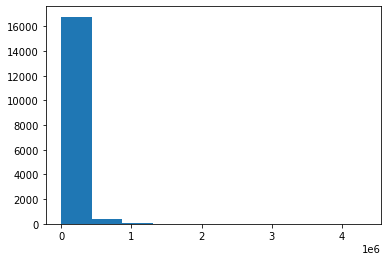

In [10]:
plt.hist(df_baseerror_train['train_error'])
plt.show()

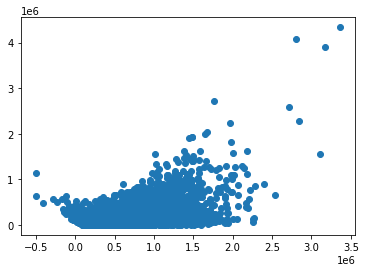

In [11]:
plt.scatter(df_baseerror_train['train_prediksi'], df_baseerror_train['train_error'])
plt.show()

In [12]:
df_baseerror_test = X_test.copy()

df_baseerror_test['test_target'] = y_test
df_baseerror_test['test_prediksi'] = y_pred_test
df_baseerror_test['test_error'] = abs(df_baseerror_test['test_target'] - df_baseerror_test['test_prediksi'])

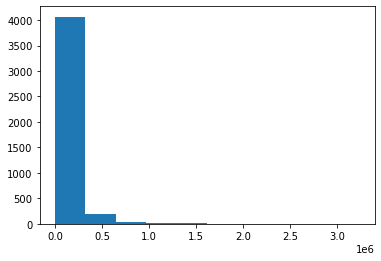

In [13]:
plt.hist(df_baseerror_test['test_error'])
plt.show()

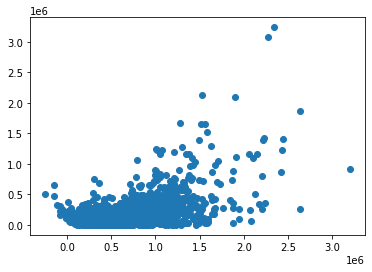

In [14]:
plt.scatter(df_baseerror_test['test_prediksi'], df_baseerror_test['test_error'])
plt.show()

====> Do PowerTransformers

#### 1.b LinearRegression Model Using Clean Dataset 

In [15]:
### Splitting the data for machine training and testing 
X_cl = df_clean.drop(columns=['id', 'date','price'])
y_cl = df_clean['price']

### Model learn
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X_cl, y_cl, test_size = .2, random_state = 42)
Model_LinReg.fit(X_train_cl, y_train_cl)

y_pred_train_cl = Model_LinReg.predict(X_train_cl)
y_pred_test_cl = Model_LinReg.predict(X_test_cl)

r2_trainBaseLinRegcl, MAE_trainBaseLinRegcl, MSE_trainBaseLinRegcl, RMSE_trainBaseLinRegcl = Eva_Matrix(Model_LinReg, X_train_cl, y_train_cl)
r2_test_BaseLinRegcl, MAE_test_BaseLinRegcl, MSE_test_BaseLinRegcl, RMSE_test_BaseLinRegcl = Eva_Matrix(Model_LinReg, X_test_cl, y_test_cl)

data_cl = {
    "Training" : [r2_trainBaseLinRegcl, MAE_trainBaseLinRegcl, MSE_trainBaseLinRegcl, RMSE_trainBaseLinRegcl],
    "Testing" : [r2_test_BaseLinRegcl, MAE_test_BaseLinRegcl, MSE_test_BaseLinRegcl, RMSE_test_BaseLinRegcl]
}

pd.DataFrame(data = data_cl, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,7.014502e-01,6.965016e-01
MAE,1.262031e+05,1.257642e+05
MSE,4.053100e+10,3.972176e+10
RMSE,2.013231e+05,1.993032e+05


#### 1.c LinearRegression Model Using Clean Dataset & Feature Selection

In [16]:
X_cl1 = df_clean.drop(columns=['id', 'date','price', 'sqft_lot', 'floors', 'sqft_lot15', 'sqft_above', 'sqft_living15'])
y_cl1 = df_clean['price']

X_train_cl1, X_test_cl1, y_train_cl1, y_test_cl1 = train_test_split(X_cl1, y_cl1, test_size = .2, random_state = 42)
Model_LinReg.fit(X_train_cl1, y_train_cl1)

y_pred_train_cl1 = Model_LinReg.predict(X_train_cl1)
y_pred_test_cl1 = Model_LinReg.predict(X_test_cl1)

r2_trainBaseLinRegcl1, MAE_trainBaseLinRegcl1, MSE_trainBaseLinRegcl1, RMSE_trainBaseLinRegcl1 = Eva_Matrix(Model_LinReg, X_train_cl1, y_train_cl1)
r2_test_BaseLinRegcl1, MAE_test_BaseLinRegcl1, MSE_test_BaseLinRegcl1, RMSE_test_BaseLinRegcl1 = Eva_Matrix(Model_LinReg, X_test_cl1, y_test_cl1)

data_cl1 = {
    "Training" : [r2_trainBaseLinRegcl1, MAE_trainBaseLinRegcl1, MSE_trainBaseLinRegcl1, RMSE_trainBaseLinRegcl1],
    "Testing" : [r2_test_BaseLinRegcl1, MAE_test_BaseLinRegcl1, MSE_test_BaseLinRegcl1, RMSE_test_BaseLinRegcl1]
}

pd.DataFrame(data = data_cl1, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,7.000181e-01,6.978617e-01
MAE,1.265423e+05,1.255942e+05
MSE,4.072542e+10,3.954375e+10
RMSE,2.018054e+05,1.988561e+05


In [17]:
### Clean Dataset Resulting better Evaluation Matrix

#### 1d. LinearRegression Features Engineering (PowerTransform & Polynomial)

In [18]:
poly = PolynomialFeatures(degree=2, include_bias=False)
#create features polynomial

yeo_pow = PowerTransformer(method='yeo-johnson')

num_col = df.drop(columns=['id', 'date','price'])

num_Poly = poly.fit_transform(num_col)
num_pow = yeo_pow.fit_transform(num_Poly)

df_Pow = pd.DataFrame(num_pow)

In [19]:
df_Pow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188
0,-0.352407,-1.571853,-1.121655,-0.331682,-0.975610,-0.087173,-0.330128,-0.597793,-0.514360,-0.736211,-0.802436,-0.647008,-0.210135,-1.0,-0.475763,-0.277754,-1.043198,-0.341991,-0.352683,-1.258369,-0.877788,-0.414543,-0.859303,-0.087173,-0.329955,-0.595558,-0.495281,-0.662740,-0.802285,-0.385573,-0.210135,-0.354033,-0.360261,0.356402,-0.819352,-0.428712,-1.570019,-1.424594,-0.994935,-1.486040,-0.087173,-0.329954,-1.716104,-1.430690,-1.275810,-0.801866,-1.555423,-0.210135,-1.566532,-1.571128,1.568381,-1.488059,-1.047993,-1.0,-1.0,-1.260534,-0.087173,-0.330128,-1.277888,-1.017977,-1.0,-0.803416,-1.125766,-0.210135,-1.119572,-1.0,1.121565,-1.0,-1.0,-1.0,-0.812564,-0.087173,-0.330128,-0.454395,-1.0,-1.0,-0.803015,-1.0,-0.210135,-1.0,-1.0,0.331433,-1.0,-1.0,-0.973202,-0.087173,-0.330127,-1.267761,-0.947568,-0.955006,-0.802534,-0.986609,-0.210135,-1.0,-0.983463,0.979493,-1.273780,-0.865036,-0.087173,-0.087173,-0.087173,-0.087173,-0.087173,-0.06749,-0.087173,-0.044125,-0.087173,-0.087173,0.087173,-0.087173,-0.087173,-0.330117,-0.330128,-0.330128,-0.330128,-0.267672,-0.330128,-0.099766,-0.330128,-0.330128,0.330128,-0.330128,-0.330128,-0.598217,-0.870212,-0.981231,-0.802726,-0.665205,-0.210135,-0.592839,-0.604585,0.596149,-1.247994,-0.473729,-0.514220,-0.712873,-0.803028,-0.544336,-0.210135,-0.510126,-0.522090,0.515139,-0.946483,-1.0,-1.0,-0.803516,-1.0,-0.210135,-0.733878,-1.0,0.736077,-1.0,-1.0,-0.802422,-0.803770,-0.147957,-0.803901,-0.803475,0.803579,-0.803572,-0.803162,-0.647008,-0.210135,-1.0,-0.689999,0.629990,-1.0,-1.0,-0.210135,-0.210135,-0.210135,0.210135,-0.210135,-0.210135,-1.0,-0.037334,-0.899864,-1.040336,-1.0,-0.475759,0.273169,-1.0,-1.0,0.277520,1.043291,0.341737,-1.043176,-1.0,-1.0
1,-0.352407,0.250882,0.706456,-0.032289,1.029432,-0.087173,-0.330128,-0.597793,-0.514360,0.704345,1.177675,-0.767848,4.758845,-1.0,1.266683,-0.752483,-0.293989,0.057683,-0.352683,0.002574,0.279072,-0.173268,0.528377,-0.087173,-0.329955,-0.595558,-0.495281,0.274524,1.171590,-0.392437,4.758845,-0.355871,-0.345240,0.354675,-0.411639,-0.108900,0.253645,0.524211,0.057810,0.746982,-0.087173,-0.329954,-0.042023,0.042100,0.523748,1.194667,0.211293,4.758845,0.250325,0.258930,-0.251375,-0.018132,0.138368,-1.0,-1.0,1.009229,-0.087173,-0.330128,0.398023,0.416746,-1.0,1.226466,0.673064,4.758845,0.707789,-1.0,-0.708970,-1.0,-1.0,-1.0,0.463915,-0.087173,-0.330128,-0.165979,-1.0,-1.0,1.214767,-1.0,4.758845,-1.0,-1.0,0.031351,-1.0,-1.0,1.031330,-0.087173,-0.330127,0.685994,0.683580,0.942954,1.250851,0.995383,4.758845,-1.0,1.038104,-1.033136,0.495905,0.583754,-0.087173,-0.087173,-0.087173,-0.087173,-0.087173,-0.06749,-0.087173,-0.044125,-0.087173,-0.087173,0.087173,-0.087173,-0.087173,-0.330117,-0.330128,-0.330128,-0.330128,-0.267672,-0.330128,-0.099766,-0.330128,-0.330128,0.330128,-0.330128,-0.330128,-0.598217,-0.870212,0.397271,1.169140,-0.677067,4.758845,-0.595924,-0.579395,0.593253,-0.600882,-0.090952,-0.514220,0.427327,1.182242,-0.557381,4.758845,-0.513743,-0.492662,0.511741,-0.373336,-1.0,-1.0,1.242003,-1.0,4.758845,0.705638,-1.0,-0.706797,-1.0,-1.0,1.177614,1.212085,6.758724,1.219308,1.201923,-1.205128,1.203472,1.219648,-0.767847,4.758845,-1.0,-0.544189,0.725030,-1.0,-1.0,4.758845,4.758845,4.758845,-4.758845,4.758845,4.758845,-1.0,1.287112,-0.877524,-0.292635,-1.0,1.266679,-1.374715,-1.0,-1.0,0.752509,0.291774,-0.0587

In [20]:
X_cl2 = df_Pow
y_cl2 = df['price']

X_train_cl2, X_test_cl2, y_train_cl2, y_test_cl2 = train_test_split(X_cl2, y_cl2, test_size = .2, random_state = 42)
Model_LinReg.fit(X_train_cl2, y_train_cl2)

y_pred_train_cl2 = Model_LinReg.predict(X_train_cl2)
y_pred_test_cl2 = Model_LinReg.predict(X_test_cl2)

r2_trainBaseLinRegcl2, MAE_trainBaseLinRegcl2, MSE_trainBaseLinRegcl2, RMSE_trainBaseLinRegcl2 = Eva_Matrix(Model_LinReg, X_train_cl2, y_train_cl2)
r2_test_BaseLinRegcl2, MAE_test_BaseLinRegcl2, MSE_test_BaseLinRegcl2, RMSE_test_BaseLinRegcl2 = Eva_Matrix(Model_LinReg, X_test_cl2, y_test_cl2)

data_cl2 = {
    "Training" : [r2_trainBaseLinRegcl2, MAE_trainBaseLinRegcl2, MSE_trainBaseLinRegcl2, RMSE_trainBaseLinRegcl2],
    "Testing" : [r2_test_BaseLinRegcl2, MAE_test_BaseLinRegcl2, MSE_test_BaseLinRegcl2, RMSE_test_BaseLinRegcl2]
}

pd.DataFrame(data = data_cl2, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,8.257321e-01,7.944854e-01
MAE,9.557152e+04,1.020985e+05
MSE,2.276786e+10,3.106901e+10
RMSE,1.508902e+05,1.762640e+05


In [21]:
df_baseerror_train2 = X_train_cl2.copy()

df_baseerror_train2['train_target'] = y_train_cl2
df_baseerror_train2['train_prediksi'] = y_pred_train
df_baseerror_train2['train_error'] = abs(df_baseerror_train2['train_target'] - df_baseerror_train2['train_prediksi'])

#### 1d. LinearRegression Features Engineering (Polynomial)

In [22]:
poly = PolynomialFeatures(degree=2, include_bias=False)
#create features polynomial

num_col = df.drop(columns=['id', 'date','price'])

num_Poly = poly.fit_transform(num_col)

df_Pol = pd.DataFrame(num_Poly)

In [23]:
X_cl3 = df_Pol
y_cl3 = df['price']

X_train_cl3, X_test_cl3, y_train_cl3, y_test_cl3 = train_test_split(X_cl3, y_cl3, test_size = .2, random_state = 42)

Model_LinReg.fit(X_train_cl3, y_train_cl3)

y_pred_train_cl3 = Model_LinReg.predict(X_train_cl3)
y_pred_test_cl3 = Model_LinReg.predict(X_test_cl3)

r2_trainBaseLinRegcl3, MAE_trainBaseLinRegcl3, MSE_trainBaseLinRegcl3, RMSE_trainBaseLinRegcl3 = Eva_Matrix(Model_LinReg, X_train_cl3, y_train_cl3)
r2_test_BaseLinRegcl3, MAE_test_BaseLinRegcl3, MSE_test_BaseLinRegcl3, RMSE_test_BaseLinRegcl3 = Eva_Matrix(Model_LinReg, X_test_cl3, y_test_cl3)

data_cl3 = {
    "Training" : [r2_trainBaseLinRegcl3, MAE_trainBaseLinRegcl3, MSE_trainBaseLinRegcl3, RMSE_trainBaseLinRegcl3],
    "Testing" : [r2_test_BaseLinRegcl3, MAE_test_BaseLinRegcl3, MSE_test_BaseLinRegcl3, RMSE_test_BaseLinRegcl3]
}

pd.DataFrame(data = data_cl3, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,8.316149e-01,7.971010e-01
MAE,9.820165e+04,1.054218e+05
MSE,2.199928e+10,3.067361e+10
RMSE,1.483216e+05,1.751388e+05


#### 1e. LinearRegression Features Engineering (Polynomial) + Features Selection

In [24]:
poly = PolynomialFeatures(degree=2, include_bias=False)
#create features polynomial

num_col = df_clean.drop(columns=['id', 'date','price', 'sqft_lot', 'floors', 'sqft_lot15', 'sqft_above', 'sqft_living15'])

num_Poly = poly.fit_transform(num_col)

df_Pol = pd.DataFrame(num_Poly)

In [25]:
X_cl4 = df_Pol
y_cl4 = df_clean['price']

X_train_cl4, X_test_cl4, y_train_cl4, y_test_cl4 = train_test_split(X_cl4, y_cl4, test_size = .2, random_state = 42)
Model_LinReg.fit(X_train_cl4, y_train_cl4)

y_pred_train_cl4 = Model_LinReg.predict(X_train_cl4)
y_pred_test_cl4 = Model_LinReg.predict(X_test_cl4)

r2_trainBaseLinRegcl4, MAE_trainBaseLinRegcl4, MSE_trainBaseLinRegcl4, RMSE_trainBaseLinRegcl4 = Eva_Matrix(Model_LinReg, X_train_cl4, y_train_cl4)
r2_test_BaseLinRegcl4, MAE_test_BaseLinRegcl4, MSE_test_BaseLinRegcl4, RMSE_test_BaseLinRegcl4 = Eva_Matrix(Model_LinReg, X_test_cl4, y_test_cl4)

data_cl4 = {
    "Training" : [r2_trainBaseLinRegcl4, MAE_trainBaseLinRegcl4, MSE_trainBaseLinRegcl4, RMSE_trainBaseLinRegcl4],
    "Testing" : [r2_test_BaseLinRegcl4, MAE_test_BaseLinRegcl4, MSE_test_BaseLinRegcl4, RMSE_test_BaseLinRegcl4]
}

pd.DataFrame(data = data_cl4, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,8.113994e-01,8.137188e-01
MAE,1.029067e+05,1.031249e+05
MSE,2.560434e+10,2.438041e+10
RMSE,1.600136e+05,1.561423e+05


### 2. ElasticNet Algorithm

#### 2a. ElasticNet Basic Model

In [26]:
Model_E = ElasticNet()

In [27]:
X_e = df.drop(columns=['id', 'date','price'])
y_e = df['price']

### Splitting the data for machine training and testing 

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_e, y_e, test_size = .2, random_state = 42)

### Model learn
Model_E.fit(X_train_e, y_train_e)

##### Evaluation Base Model (LinearRegression)
y_pred_train_e = Model_E.predict(X_train_e)
y_pred_test_e = Model_E.predict(X_test_e)

r2_trainBaseEnet, MAE_trainBaseEnet, MSE_trainBaseEnet, RMSE_trainBaseEnet = Eva_Matrix(Model_E, X_train_e, y_train_e)
r2_test_BaseEnet, MAE_test_BaseEnet, MSE_test_BaseEnet, RMSE_test_BaseEnet = Eva_Matrix(Model_E, X_test_e, y_test_e)

dataEnet = {
    "Training" : [r2_trainBaseEnet, MAE_trainBaseEnet, MSE_trainBaseEnet, RMSE_trainBaseEnet],
    "Testing" : [r2_test_BaseEnet, MAE_test_BaseEnet, MSE_test_BaseEnet, RMSE_test_BaseEnet ]
}

pd.DataFrame(data = dataEnet, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.207735e-01,6.143358e-01
MAE,1.439755e+05,1.489419e+05
MSE,4.954542e+10,5.830344e+10
RMSE,2.225880e+05,2.414611e+05


#### 2b. ElasticNet Model + Features Selection

In [28]:
X_e1 = df_clean.drop(columns=['id', 'date','price', 'sqft_lot', 'floors', 'sqft_lot15', 'sqft_above', 'sqft_living15'])
y_e1 = df_clean['price']

### Splitting the data for machine training and testing 

X_train_e1, X_test_e1, y_train_e1, y_test_e1 = train_test_split(X_e1, y_e1, test_size = .2, random_state = 42)

### Model learn
Model_E.fit(X_train_e1, y_train_e1)

##### Evaluation Base Model (LinearRegression)
y_pred_train_e1 = Model_E.predict(X_train_e1)
y_pred_test_e1 = Model_E.predict(X_test_e1)

r2_trainBaseEnet1, MAE_trainBaseEnet1, MSE_trainBaseEnet1, RMSE_trainBaseEnet1 = Eva_Matrix(Model_E, X_train_e1, y_train_e1)
r2_test_BaseEnet1, MAE_test_BaseEnet1, MSE_test_BaseEnet1, RMSE_test_BaseEnet1 = Eva_Matrix(Model_E, X_test_e1, y_test_e1)

dataEnet1 = {
    "Training" : [r2_trainBaseEnet1, MAE_trainBaseEnet1, MSE_trainBaseEnet1, RMSE_trainBaseEnet1],
    "Testing" : [r2_test_BaseEnet1, MAE_test_BaseEnet1, MSE_test_BaseEnet1, RMSE_test_BaseEnet1 ]
}

pd.DataFrame(data = dataEnet1, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.192028e-01,6.107259e-01
MAE,1.458618e+05,1.447835e+05
MSE,5.169687e+10,5.094806e+10
RMSE,2.273695e+05,2.257168e+05


#### 2c. ElasticNet Model + Features Selection + Manual Tuning

In [29]:
param_a = [0.001, 0.01, 1, 10, 20, 30, 40, 50, 100] 

In [30]:
def Manual_Tune_E(Alpha, X_train, X_test, y_train, y_test):
    train_r = []
    test_r = []
    for i in Alpha:
        Model = ElasticNet(alpha = i)
        Model.fit(X_train, y_train)
        y_pred_train = Model.predict(X_train)
        R2_train = r2_score(y_train, y_pred_train)
        train_r.append(R2_train)
        y_pred_test = Model.predict(X_test)
        R2_test = r2_score(y_test, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r

In [31]:
train_Enet, test_Enet = Manual_Tune_E(param_a, X_train_e1, X_test_e1, y_train_e1, y_test_e1)

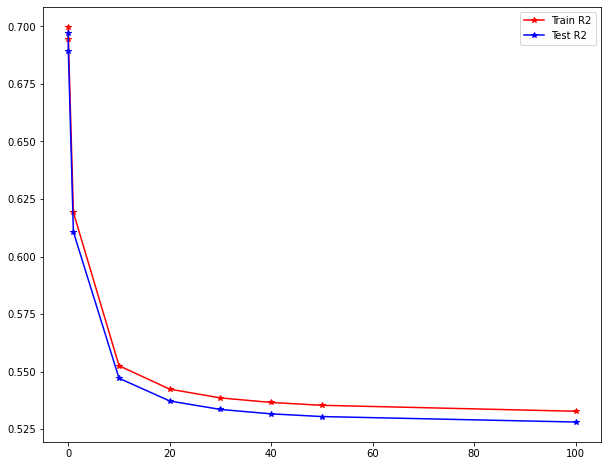

In [32]:
plt.figure(figsize=(10,8))
plt.plot(param_a, train_Enet, 'r*-')
plt.plot(param_a, test_Enet, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

===> Better Use Alpha = 0

### 3. Lasso Algorithm

#### 3a. Lasso Basic Model

In [33]:
Model_L = Lasso()

In [34]:
### Model learn
Model_L.fit(X_train_e, y_train_e)

##### Evaluation Base Model (LinearRegression)
y_pred_train_L = Model_L.predict(X_train_e)
y_pred_test_L = Model_L.predict(X_test_e)

r2_trainBaseLasso, MAE_trainBaseLasso, MSE_trainBaseLasso, RMSE_trainBaseLasso = Eva_Matrix(Model_L, X_train_e, y_train_e)
r2_test_BaseLasso, MAE_test_BaseLasso, MSE_test_BaseLasso, RMSE_test_BaseLasso = Eva_Matrix(Model_L, X_test_e, y_test_e)

dataLasso = {
    "Training" : [r2_trainBaseLasso, MAE_trainBaseLasso, MSE_trainBaseLasso, RMSE_trainBaseLasso ],
    "Testing" : [r2_test_BaseLasso, MAE_test_BaseLasso, MSE_test_BaseLasso, RMSE_test_BaseLasso ]
}

pd.DataFrame(data = dataLasso, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.991022e-01,7.011872e-01
MAE,1.250322e+05,1.274929e+05
MSE,3.931188e+10,4.517354e+10
RMSE,1.982722e+05,2.125407e+05


### 4. Ridge Algorithm

#### 4a. Ridge Basic Model

In [35]:
Model_R = Ridge()

In [36]:
### Model learn
Model_R.fit(X_train_e, y_train_e)

##### Evaluation Base Model (LinearRegression)
y_pred_train_R = Model_R.predict(X_train_e)
y_pred_test_R = Model_R.predict(X_test_e)

r2_trainBaseRidge, MAE_trainBaseRidge, MSE_trainBaseRidge, RMSE_trainBaseRidge = Eva_Matrix(Model_R, X_train_e, y_train_e)
r2_test_BaseRidge, MAE_test_BaseRidge, MSE_test_BaseRidge, RMSE_test_BaseRidge = Eva_Matrix(Model_R, X_test_e, y_test_e)

dataRidge= {
    "Training" : [r2_trainBaseRidge, MAE_trainBaseRidge, MSE_trainBaseRidge, RMSE_trainBaseRidge ],
    "Testing" : [r2_test_BaseRidge, MAE_test_BaseRidge, MSE_test_BaseRidge, RMSE_test_BaseRidge ]
}

pd.DataFrame(data = dataRidge, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.991002e-01,7.011110e-01
MAE,1.250150e+05,1.274876e+05
MSE,3.931214e+10,4.518505e+10
RMSE,1.982729e+05,2.125678e+05


### Conclusion

- To predict house price, we advice to utilize LinearRegression Model with Features Engineering Polynomial with Features Selection